In [15]:
import numpy as np
import pandas as pd
import random
import statistics
import glob

import matplotlib.pyplot as plt
%matplotlib inline
%config InlineBackend.figure_formats = ['svg']

import seaborn as sns
sns.set(style='whitegrid', palette='muted')


In [38]:
max_length = 10000
noise = 2
max_seasonality = 24*7
# over_sampling_rate = 1
path = "yahoo/"

data_dir="/home/ubuntu/ydata-labeled-time-series-anomalies-v1_0/A4Benchmark/A4Benchmark-TS*"
files = glob.glob(data_dir)

for filename in files[:]:
    df = pd.read_csv(filename)

    max_outlier_value, min_outlier_value = max(df['noise']), min(df['noise'])
    mean, stddev = statistics.mean(df['noise']), statistics.stdev(df['noise'])
    
    initial_trend = df['trend'][0]
    last_trend = df['trend'].iloc[-1]
    trend_subtracted_series = df['trend'] - initial_trend
    # trend_subtracted_series = np.repeat(trend_subtracted_series, over_sampling_rate)

    seasonality = df['seasonality1'] + df['seasonality2'] + df['seasonality3']
    # seasonality = np.repeat(seasonality, over_sampling_rate)

    repeat_length = (len(trend_subtracted_series) // max_seasonality) * max_seasonality

    count = 0
    generated_trend = [last_trend] * max_length
    generated_noise = [0] * max_length
    generated_outlier = [0] * max_length
    generated_seasonality = [0] * max_length

    for i in range(max_length):
        if count >= repeat_length:
            count = 0
            last_trend = generated_trend[i-1]
        generated_trend[i] = last_trend + trend_subtracted_series[count]
        generated_seasonality[i] = seasonality[count]
        generated_noise[i] = random.gauss(mean, stddev)
        generated_outlier[i] = 0
        if random.randint(0, 100) > 100 - noise:
            if random.randint(0, 100) > 50:
                generated_outlier[i] = max_outlier_value * random.randint(70,100) // 100
            else:
                generated_outlier[i] = min_outlier_value * random.randint(70,100) // 100
        count += 1

    new_df = pd.DataFrame({"trend": generated_trend, "noise": generated_noise, "outlier": generated_outlier, "seasonality": generated_seasonality })
    new_df['value'] = new_df['trend'] + new_df['noise'] + new_df['outlier'] + new_df['seasonality']
    break

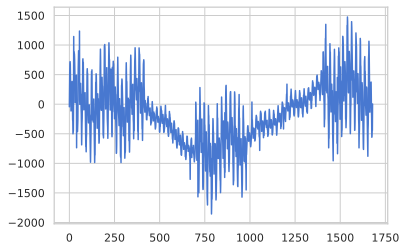

In [41]:
plt.plot(np.arange(len(df)), df["value"])

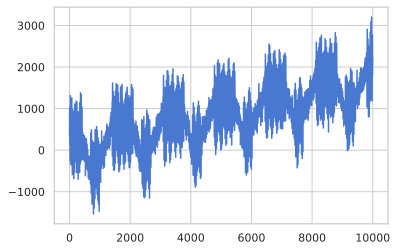

In [42]:
plt.plot(np.arange(len(new_df)), new_df["value"])